In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
data = pd.read_csv('//content//student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,NaN,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [19]:

print(data.isnull().sum())

data.dropna(subset=['Hours'], inplace=True)


Hours     0
Scores    0
dtype: int64


In [20]:

import statsmodels.formula.api as sm
model = sm.ols('Scores ~ Hours', data=data)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     463.1
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           2.66e-15
Time:                        07:57:38   Log-Likelihood:                -67.555
No. Observations:                  22   AIC:                             139.1
Df Residuals:                      20   BIC:                             141.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2578      2.553      1.276      0.2

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Hours']], data['Scores'], test_size=0.2, random_state=45)
lm = LinearRegression()
X = data[['Hours']]
y = data['Scores']
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

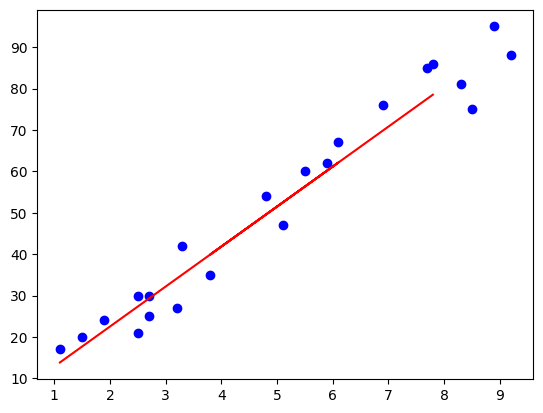

In [49]:
plt.scatter(X,y, color='blue',label='Data Points')
plt.plot(X_test,y_pred,color='red',label='reg')
plt.show()

In [51]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 4.9711814108080885
Mean Squared Error: 26.691606287029778
Root Mean Squared Error: 5.166391998970827
R2 Score: 0.9539609385141614
Explained Variance Score: 0.9695424885234565


In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [94]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly_test = poly.fit_transform(X_test)

In [95]:
model = LinearRegression()
model.fit(X_poly, y)



LinearRegression()

In [96]:
y_pred = model.predict(X_poly)

In [97]:
# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 19.446031821267855
R^2 Score: 0.9704111761126802


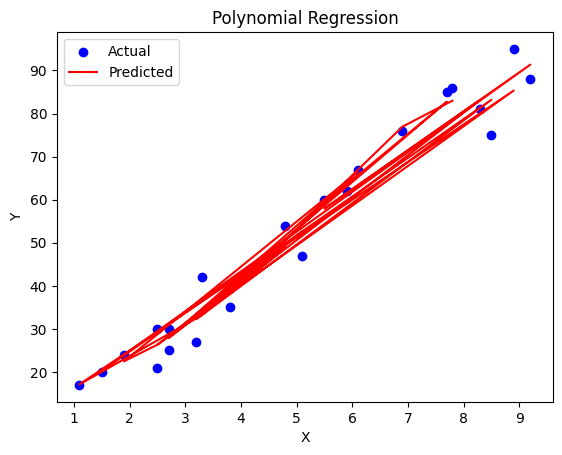

In [98]:
# Visualize the results
plt.scatter(X, y, color='blue', label="Actual")
plt.plot(X, y_pred, color='red', label="Predicted")
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()